# Function to automatic merge and fill missing values



## Create the function
You have to create a function which take 2 arguments :
- argument 1 : DataFrame main
- argument 2 : DataFrame opinion

Your function will return a new DataFrame which is the left merge of both DataFrames, and which has no missing values (so your function has to fill them), add new columns (flag, MONTH and DAY), and OPINION should be translated.

So you have to copy each useful code from the previous quests, and integrate it into a function. **This should achieve the same results as the previous quests.**

In [ ]:
import pandas as pd
link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
display(df_main.head(2))
display(df_opinion.head(2))

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.5,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.0,1020,87.875,13,12,6


,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad


In [ ]:
def merge_and_fill(DataFrameMain, DataFrameOpinion):
  # MERGE
  df_new=pd.merge(DataFrameMain,

         DataFrameOpinion,

         how="left",

         left_on='DATE',

         right_on='date')


  # FILL IN MISSING VALUES

  #df_new.fillna('No data')
  df_new['date'] = df_new.DATE
  df_new.WEATHER_CODE_EVENING.fillna(df_new.WEATHER_CODE_EVENING.median(), inplace= True)

  df_new.TOTAL_SNOW_MM.fillna(df_new.TOTAL_SNOW_MM.median(), inplace = True)

  df_new.UV_INDEX.fillna(method='ffill', inplace = True)
  df_new.SUNHOUR.fillna(method= 'ffill', inplace= True)
  #df_new.OPINION.fillna(method='ffill', inplace= True)



  # ADD NEW COLUMNS

  df_new['flag']=df_new['OPINION'].isna()
  df_new['date']=pd.to_datetime(df_new['date'])
  df_new['MONTH']=df_new['date'].dt.month
  df_new['DAY']=df_new['date'].dt.day

    # TRANSLATE OPINION
  def translate(OPINION):
    if OPINION == 'bad':
      return 'mauvais'
    if OPINION == 'very bad':
      return 'très mauvais'
    if OPINION == 'very good':
      return 'très bien'
    if OPINION=='good':
      return 'bien'
    if OPINION=='not good not bad':
      return 'moyen'
    else:
      return[OPINION]
      translate('unknown')
    df_new['OPINION']=df_new['OPINION'].apply(translate)


  return df_new

merge_and_fill(df_main, df_opinion)


,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,...,7,2018-01-01,113.0,0.0,3.0,5.1,bad,False,1,1
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,...,6,2018-01-02,122.0,0.0,3.0,3.3,bad,False,1,2
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,...,7,2018-01-03,122.0,0.0,3.0,3.3,bad,False,1,3
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,...,10,2018-01-04,116.0,0.0,3.0,3.3,bad,False,1,4
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,...,7,2018-01-05,116.0,0.0,3.0,6.9,bad,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,3,2018-12-27,119.0,0.0,1.0,8.7,very bad,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,4,2018-12-28,113.0,0.0,1.0,8.7,very bad,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,1,2018-12-29,116.0,0.0,1.0,8.7,very bad,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,7,2018-12-30,143.0,0.0,1.0,3.3,very bad,False,12,30


## Execution with a loop
You will execute your function in a 9 rounds loop, once per year, and agregate this in a new big DataFrame with 24 columns and lots of rows.

In [ ]:
# Each year between 2010 and 2018 (included) has 2 sources : weather_main_YYYY.csv and weather_opinion_YYYY.csv
dftotal=pd.DataFrame()
for year in range(2010, 2019):
  year = str(year)
  link_main = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_main_" + year + ".csv"
  link_opinion = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather_opinion_" + year + ".csv"
  df_main = pd.read_csv(link_main)
  df_opinion = pd.read_csv(link_opinion)
  df_year = merge_and_fill(df_main , df_opinion)
  #merge_and_fill(df_main,df_opinion)
  dftotal=pd.concat([dftotal,df_year])
dftotal






,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,flag,MONTH,DAY
0,2010-01-01,5,2,19,2,5,3,0.0,86,10.000,...,-1,2010-01-01,119.0,0.0,1.0,5.1,very bad,False,1,1
1,2010-01-02,5,-1,6,-1,4,1,0.0,78,10.000,...,2,2010-01-02,116.0,0.0,1.0,8.7,very bad,False,1,2
2,2010-01-03,5,1,26,2,4,2,0.3,61,9.875,...,-3,2010-01-03,119.0,0.0,1.0,6.9,very bad,False,1,3
3,2010-01-04,1,-4,25,-2,0,-3,0.0,75,10.000,...,-9,2010-01-04,113.0,0.0,1.0,8.7,very bad,False,1,4
4,2010-01-05,2,-5,20,-5,1,-4,0.0,71,10.000,...,-10,2010-01-05,113.0,0.0,1.0,8.7,very bad,False,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2018-12-27,7,2,6,2,6,5,0.0,85,10.000,...,3,2018-12-27,119.0,0.0,1.0,8.7,very bad,False,12,27
361,2018-12-28,7,2,8,2,7,3,0.0,89,8.000,...,4,2018-12-28,113.0,0.0,1.0,8.7,very bad,False,12,28
362,2018-12-29,7,1,6,1,6,4,0.0,94,7.000,...,1,2018-12-29,116.0,0.0,1.0,8.7,very bad,False,12,29
363,2018-12-30,9,4,6,5,9,8,0.1,95,6.000,...,7,2018-12-30,143.0,0.0,1.0,3.3,very bad,False,12,30


In [ ]:
df_main.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,PRESSURE_MAX_MB,CLOUDCOVER_AVG_PERCENT,HEATINDEX_MAX_C,DEWPOINT_MAX_C,WINDTEMP_MAX_C
0,2018-01-01,12,8,61,9,11,8,8.9,79,9.500,1018,41.750,12,8,7
1,2018-01-02,13,6,26,8,12,13,0.6,96,9.000,1020,87.875,13,12,6
2,2018-01-03,15,10,40,11,12,10,5.5,82,8.500,1017,91.500,15,13,7
3,2018-01-04,14,11,45,14,14,11,0.0,89,10.000,1011,90.125,14,12,10
4,2018-01-05,12,7,21,10,11,8,1.5,85,9.875,1005,62.375,12,10,7


In [ ]:
df_opinion.head()

,date,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION
0,2018-01-01,113,0,3,5.1,bad
1,2018-03-12,119,0,2,8.8,bad
2,2018-03-09,116,0,3,10.2,bad
3,2018-10-07,122,0,1,5.6,bad
4,2018-06-18,119,0,1,12.9,bad


## Add 2019 to 2022

In [ ]:
# Each year since 2019 (included) has 1 source : weatherYYYY.csv
# Chaque année depuis 2019 (inclus) a une seule source avec ce format de nom de fichier : weatherYYYY.csv


dataframes = []



base_url = "https://raw.githubusercontent.com/WildCodeSchool/data-training-resources/main/quests/weather"

for year in range(2019, 2023):
    url = f"{base_url}{year}.csv"
    df = pd.read_csv(url)
    dataframes.append(df)

final_df = pd.concat(dataframes, ignore_index=True)

final_df

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY,SUNSET,SUNRISE,TEMPERATURE_NIGHT_C
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.00,...,176,0.0,1,5.1,very bad,1.0,1.0,NaN,NaN,NaN
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.00,...,116,0.0,1,8.7,very bad,1.0,2.0,NaN,NaN,NaN
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.00,...,116,0.0,1,8.7,very bad,1.0,3.0,NaN,NaN,NaN
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.00,...,122,0.0,1,5.1,very bad,1.0,4.0,NaN,NaN,NaN
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.00,...,116,0.0,1,8.7,very bad,1.0,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2022-12-27,10,3,19,3,7,8,0.1,78,10.00,...,122,0.0,3,6.9,météo très défavorable,NaN,NaN,17:23:00,08:52:00,4.0
1457,2022-12-28,12,7,35,7,12,12,0.6,95,10.00,...,353,0.0,4,6.9,météo défavorable,NaN,NaN,17:23:00,08:52:00,7.0
1458,2022-12-29,12,8,18,10,12,9,0.6,92,10.00,...,176,0.0,3,3.3,météo défavorable,NaN,NaN,17:24:00,08:53:00,11.0
1459,2022-12-30,15,7,47,11,14,15,3.5,95,9.75,...,353,0.0,4,3.3,météo défavorable,NaN,NaN,17:25:00,08:53:00,8.0


# Draw a scatterplot
With Date on X-Axis and Max Temperature on Y-axis

The result must have 13 seasonality for the 13 summers/winters alternance.




In [ ]:
df_concat20102022 = pd.concat([dftotal, final_df])

In [ ]:
#df_concat20102022['MONTH']=df_concat20102022['DATE'].dt.month


In [ ]:
df_concat20102022['MONTH'].tail()

1456   NaN
1457   NaN
1458   NaN
1459   NaN
1460   NaN
Name: MONTH, dtype: float64

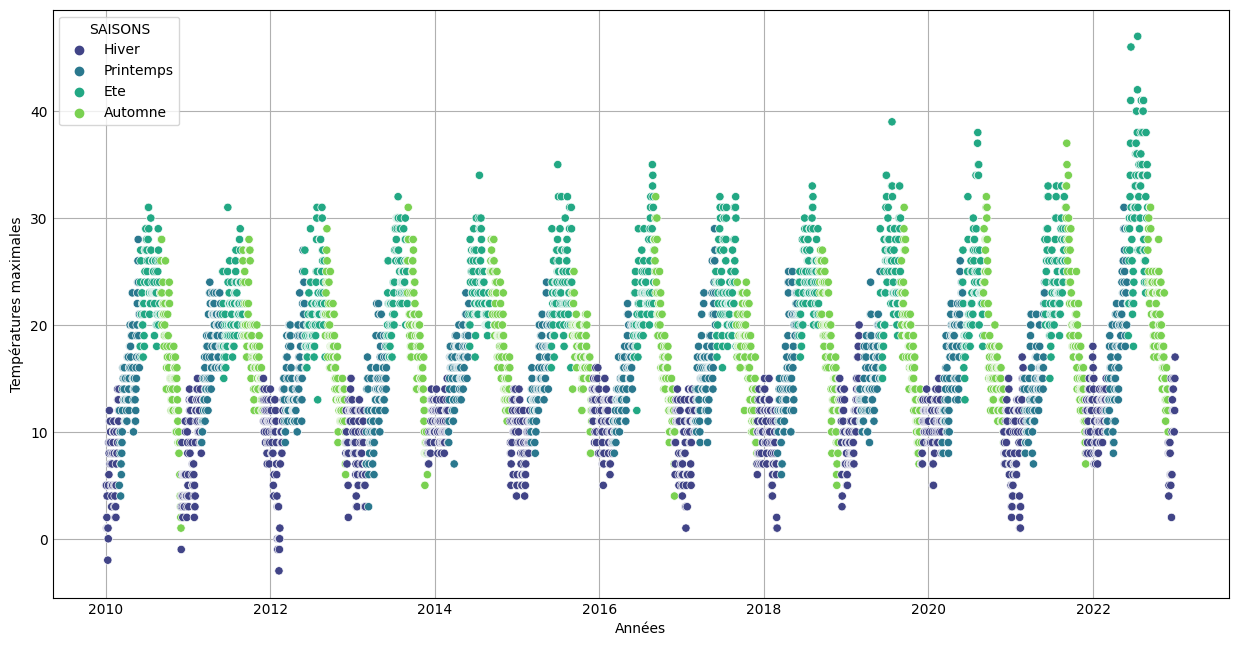

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

def season(month):
  if month in [12, 1, 2]:
    return "Hiver"
  if month in [3, 4, 5]:
    return "Printemps"
  if month in [6, 7, 8]:
    return "Ete"
  else:
    return "Automne"

df_concat20102022['MONTH']=df_concat20102022['DATE'].dt.month
df_concat20102022["SAISONS"] = df_concat20102022["MONTH"].apply(season)

Date = pd.to_datetime(df_concat20102022['DATE'])

plt.style.use('_mpl-gallery')

plt.figure(figsize = (12,6))

graph1 = sns.scatterplot(data = df_concat20102022, x= Date, y= 'MAX_TEMPERATURE_C', hue = "SAISONS", palette = "viridis")
graph1.set_ylabel("Températures maximales")
graph1.set_xlabel("Années")
plt.show()


Find appropriate dataviz to answer to this question :

Which year had the best weather? Are years very different or not ?


In [ ]:
df_concat20102022["DATE"] = pd.to_datetime(df_concat20102022["DATE"])

In [ ]:
df_concat20102022["YEAR"] =  df_concat20102022["DATE"].dt.year

<Axes: xlabel='YEAR'>

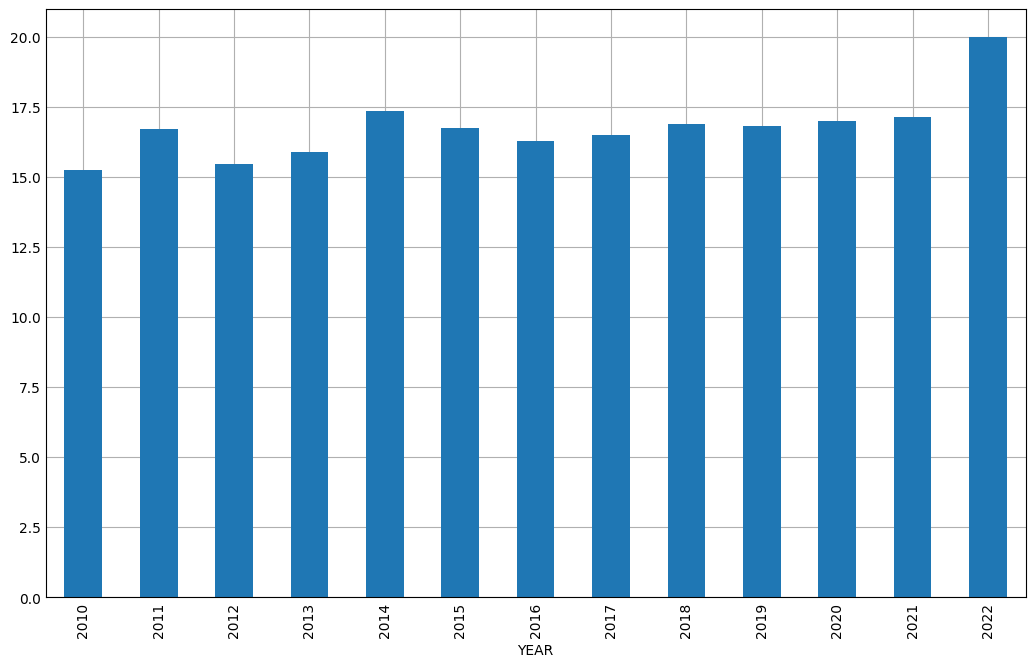

In [ ]:

df_concat20102022.groupby('YEAR')['MAX_TEMPERATURE_C'].mean().plot.bar(figsize=(10,6))
#graph2 = sns.scatterplot(data = df_concat20102022, x= Date, y= 'MAX_TEMPERATURE_C', hue = "SAISONS", palette = "viridis")


In [ ]:
import plotly.express as px

fig = px.scatter(df_concat20102022, x="DATE", y="MAX_TEMPERATURE_C",
	         size="PRECIP_TOTAL_DAY_MM",
                 size_max=60, color='OPINION',
                color_discrete_sequence=["red",  "white", "orange", "yellow", "lightgreen", "green"],
                 title = 'Precipitation and temperature over the years with opinion about weather')
fig.show()

In [ ]:
fig = px.scatter(df_concat20102022, x = 'MAX_TEMPERATURE_C', y = 'WINDSPEED_MAX_KMH', size = 'PRECIP_TOTAL_DAY_MM', animation_frame = 'YEAR', title = 'Change of windspeed, temperature and precipitation over the years',
                 color='OPINION', color_discrete_sequence=["red",  "white", "orange", "yellow", "lightgreen", "green"]) #Complete this code
fig.update_xaxes(range=[0, 40])
fig.update_yaxes(range=[0, 60])
fig.show()